In [2]:
import json
with open("../data/hipt_last_layer/last_layer_stats.json") as f:
    n_patches = json.load(f)

In [3]:
with open("../data/patient_info/report_id_specimen_map.json") as f:
    report_id_specimen_map = json.load(f)

In [4]:
import pandas as pd
df = pd.DataFrame(report_id_specimen_map.items(), columns=["report_id", "specimen"])
df['n_patches'] = df['specimen'].map({int(k[:-4]): v for k, v in n_patches.items()})

In [22]:
report_file = "../data/medical_reports/H&E_IHC_plus_preprocessed.json"
train_ids_file = "../data/train_val_test/patient_ids_train.txt"
val_ids_file = "../data/train_val_test/patient_ids_val.txt"
test_ids_file = "../data/train_val_test/patient_ids_test.txt"

def read_patient_ids(file_path):
    with open(file_path, 'r') as f:
        ids = f.read().strip().split(',')
        return set(ids)
    
# Reading patient IDs
train_patient_ids = read_patient_ids(train_ids_file)
val_patient_ids = read_patient_ids(val_ids_file)
test_patient_ids = read_patient_ids(test_ids_file)

In [6]:
# Load the report file once
with open(report_file, "r") as f:
    reports = json.load(f)

In [7]:
train_report_id_list = []
for patient in list(train_patient_ids):
    train_report_id_list.append(list(reports[patient].keys()))

train_report_id_list = [item for sublist in train_report_id_list for item in sublist]

val_report_id_list = []
for patient in list(val_patient_ids):
    val_report_id_list.append(list(reports[patient].keys()))

val_report_id_list = [item for sublist in val_report_id_list for item in sublist]

test_report_id_list = []
for patient in list(test_patient_ids):
    test_report_id_list.append(list(reports[patient].keys()))

test_report_id_list = [item for sublist in test_report_id_list for item in sublist]

In [ ]:
# Add 'train', 'val', 'test' as value in the column
df['split'] = 'Unknown'
df.loc[df['report_id'].isin(train_report_id_list), 'split'] = 'train'
df.loc[df['report_id'].isin(val_report_id_list), 'split'] = 'val'
df.loc[df['report_id'].isin(test_report_id_list), 'split'] = 'test'

In [ ]:
with open("../data/patient_info/patient_characteristics.xlsx", "rb") as f:
    patient_characteristics = pd.read_excel(f)

In [ ]:
patient_characteristics['specimen'] = patient_characteristics['specimen'].apply(
    lambda x: x[:9] + "_" + x[9:]
)

In [ ]:
df['specimen'] = df['report_id']
df = df[df['split']!='Unknown']

In [ ]:
df = pd.merge(df, patient_characteristics, on='specimen', how='left')

In [ ]:
report_list = [
    None
]

In [ ]:
df = df[df['specimen'].isin(report_list)]

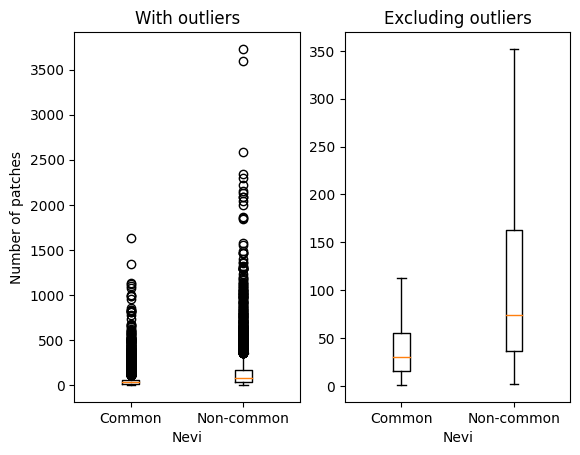

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].boxplot([df[df['label']==False]['n_patches'], df[df['label']==True]['n_patches']], labels=['Common', 'Non-common'])
ax[1].boxplot([df[df['label']==False]['n_patches'], df[df['label']==True]['n_patches']], showfliers=False, labels=['Common nevi', 'Non-common nevi'])
ax[0].set_title('With outliers')
ax[1].set_title('Excluding outliers')
ax[0].set_ylabel('Number of patches')
ax[0].set_xticklabels(['Common', 'Non-common'], rotation=0)
ax[1].set_xticklabels(['Common', 'Non-common'], rotation=0)
ax[0].set_xlabel('Nevi')
ax[1].set_xlabel('Nevi')

plt.show()

/tmp/ipykernel_30112/4125753032.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/tmp/ipykernel_30112/4125753032.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['label'].map({False: 'Common', True: 'Non-common'}),
/tmp/ipykernel_30112/4125753032.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['label'].map({False: 'Common', True: 'Non-common'}),


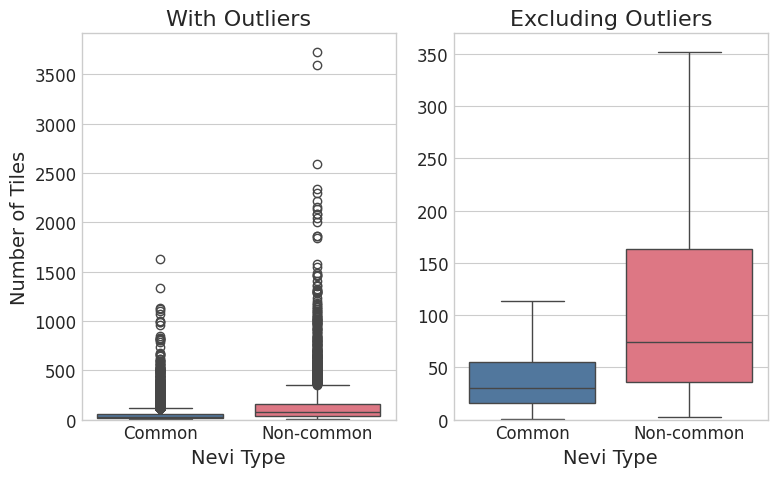

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean style
plt.style.use('seaborn-whitegrid')

# Increase font sizes
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# Create figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

# Define custom colorblind-friendly palette
colors = ["#4477AA", "#EE6677"]  # Common nevi (blue) / Non-common nevi (red)

# Plot boxplots with and without outliers
sns.boxplot(data=df, x=df['label'].map({False: 'Common', True: 'Non-common'}), 
            y='n_patches', ax=ax[0], palette=colors)
sns.boxplot(data=df, x=df['label'].map({False: 'Common', True: 'Non-common'}), 
            y='n_patches', ax=ax[1], palette=colors, showfliers=False)

# Adjust labels
ax[0].set_title('With Outliers')
ax[1].set_title('Excluding Outliers')

for a in ax:
    a.set_xlabel('Nevi Type')
    a.set_ylim(0, )
    if a == ax[0]:
        a.set_ylabel('Number of Tiles')
    else:
        a.set_ylabel('')

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_30112/525429716.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=df['label'], y=df['n_patches'], scale='width', inner='quartile')


<Axes: xlabel='label', ylabel='n_patches'>

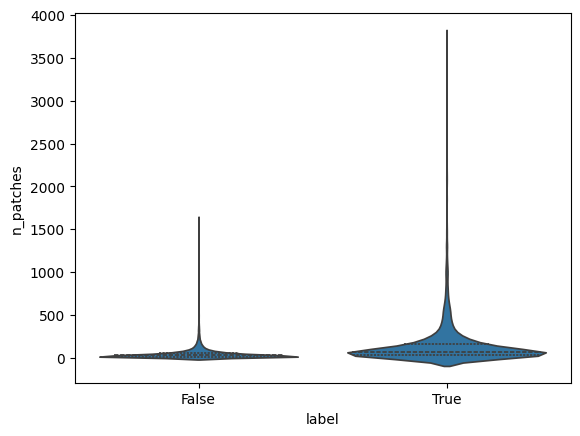

In [ ]:
import seaborn as sns
sns.violinplot(x=df['label'], y=df['n_patches'], scale='width', inner='quartile')
# plt.yscale('log')  # Apply log scale if necessary

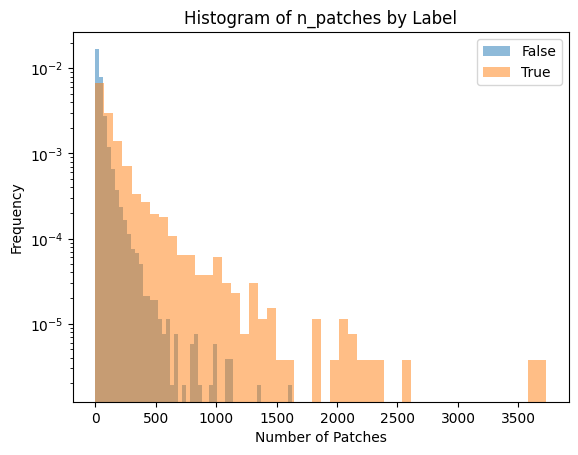

In [ ]:
plt.hist(df[df['label']==False]['n_patches'], bins=50, density=True, alpha=0.5, label='False')
plt.hist(df[df['label']==True]['n_patches'], bins=50, density=True, alpha=0.5, label='True')
# import seaborn as sns
# sns.kdeplot(df[df['label']==False]['n_patches'], label='False', color='blue', fill=True, alpha=0.3)
# sns.kdeplot(df[df['label']==True]['n_patches'], label='True', color='orange', fill=True, alpha=0.3)

plt.yscale('log')  # If skewed
# plt.xscale('log')
plt.legend()
plt.xlabel("Number of Patches")
plt.ylabel("Frequency")
plt.title("Histogram of n_patches by Label")

plt.show()

In [ ]:
df.groupby('label')['n_patches'].describe()
# df['n_patches'].describe()

# add median
# df.groupby('label')['n_patches'].describe().loc[:, ['mean', 'std', '50%']]

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
False,16090.0,48.320075,65.338127,1.0,16.00,30.0,55.0,1628.0
True,3546.0,150.905527,241.922987,2.0,36.25,74.0,163.0,3730.0


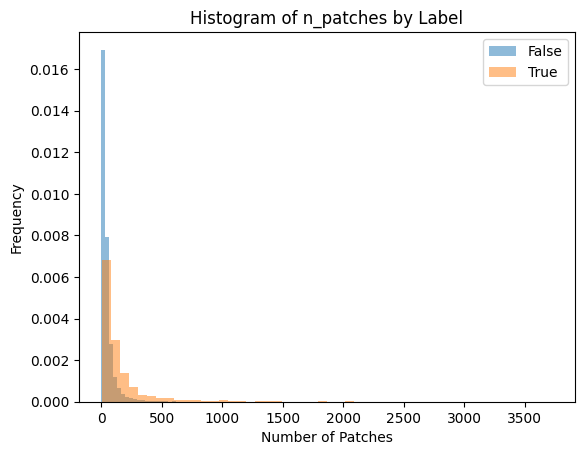

In [ ]:
plt.hist(df[df['label']==False]['n_patches'], bins=50, density=True, alpha=0.5, label='False')
plt.hist(df[df['label']==True]['n_patches'], bins=50, density=True, alpha=0.5, label='True')
# import seaborn as sns
# sns.kdeplot(df[df['label']==False]['n_patches'], label='False', color='blue', fill=True, alpha=0.3)
# sns.kdeplot(df[df['label']==True]['n_patches'], label='True', color='orange', fill=True, alpha=0.3)

# plt.yscale('log')  # If skewed
# plt.xscale('log')
plt.legend()
plt.xlabel("Number of Patches")
plt.ylabel("Frequency")
plt.title("Histogram of n_patches by Label")
plt.show()